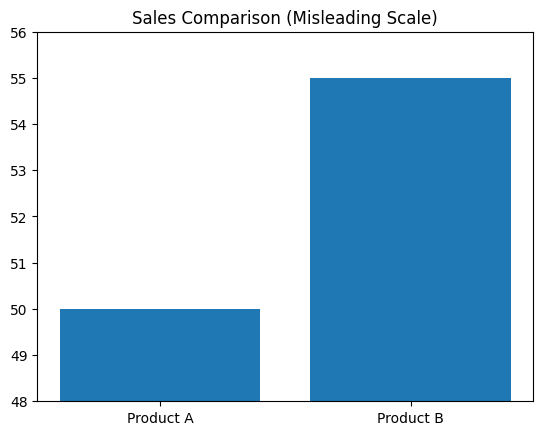

In [1]:
import matplotlib.pyplot as plt

x = ["Product A", "Product B"]
y = [50, 55]

plt.bar(x, y)
plt.ylim(48, 56)  # misleading scale
plt.title("Sales Comparison (Misleading Scale)")
plt.show()


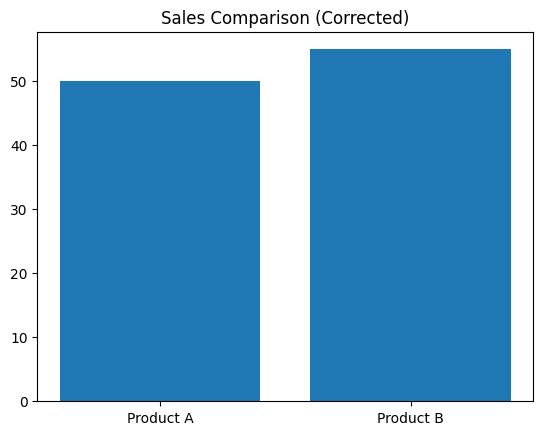

In [2]:
plt.bar(x, y)
plt.title("Sales Comparison (Corrected)")
plt.show()


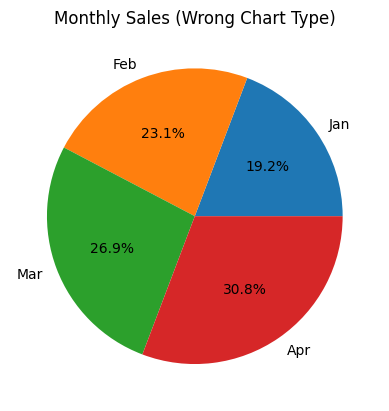

In [3]:
labels = ["Jan", "Feb", "Mar", "Apr"]
values = [100, 120, 140, 160]

plt.pie(values, labels=labels, autopct='%1.1f%%')
plt.title("Monthly Sales (Wrong Chart Type)")
plt.show()


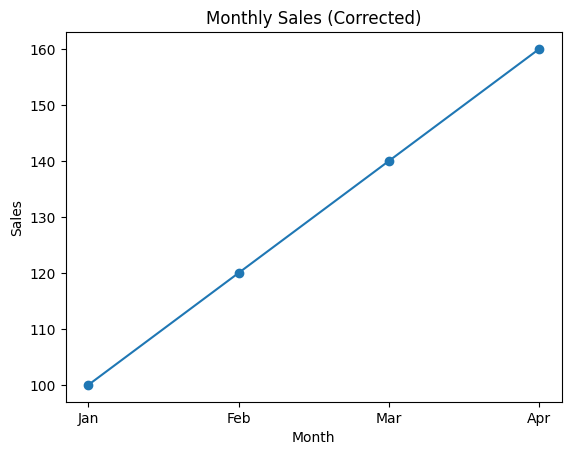

In [4]:
plt.plot(labels, values, marker="o")
plt.title("Monthly Sales (Corrected)")
plt.xlabel("Month")
plt.ylabel("Sales")
plt.show()


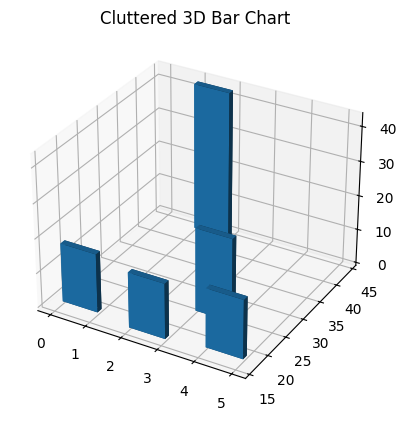

In [5]:
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")

x = np.arange(5)
y = np.random.randint(10, 50, size=5)
z = np.zeros(5)
dx = dy = np.ones(5)
dz = y

ax.bar3d(x, y, z, dx, dy, dz)
plt.title("Cluttered 3D Bar Chart")
plt.show()


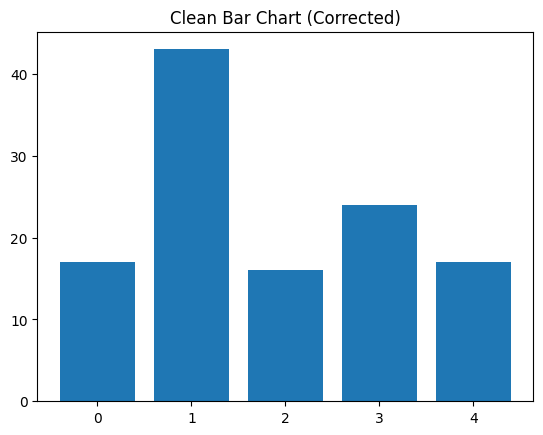

In [6]:
plt.bar(x, y)
plt.title("Clean Bar Chart (Corrected)")
plt.show()


In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Load iris dataset
iris = sns.load_dataset("iris")

# Quick look
print(iris.head())
print(iris.describe())


   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa
       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.057333      3.758000     1.199333
std        0.828066     0.435866      1.765298     0.762238
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


In [ ]:
# Task 2: Iris Dataset Exploratory Analysis & Storytelling

## Dataset Overview
The Iris dataset contains measurements of 150 iris flowers from three different species: setosa, versicolor, and virginica. Each flower has four measurements: sepal length, sepal width, petal length, and petal width (all in centimeters).

**Goal**: Explore the dataset to understand species characteristics and create compelling visualizations that tell the story of how different iris species can be distinguished by their physical measurements.

In [2]:
# Basic dataset information
print("=== DATASET EXPLORATION ===")
print(f"Dataset shape: {iris.shape}")
print(f"Number of species: {iris['species'].nunique()}")
print(f"Species distribution:")
print(iris['species'].value_counts())
print(f"\nMissing values: {iris.isnull().sum().sum()}")

# Check data types
print(f"\nData types:")
print(iris.dtypes)

=== DATASET EXPLORATION ===
Dataset shape: (150, 5)
Number of species: 3
Species distribution:
species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

Missing values: 0

Data types:
sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object


## Exploratory Data Analysis

Let's explore the relationships between different measurements and see how they vary across species.

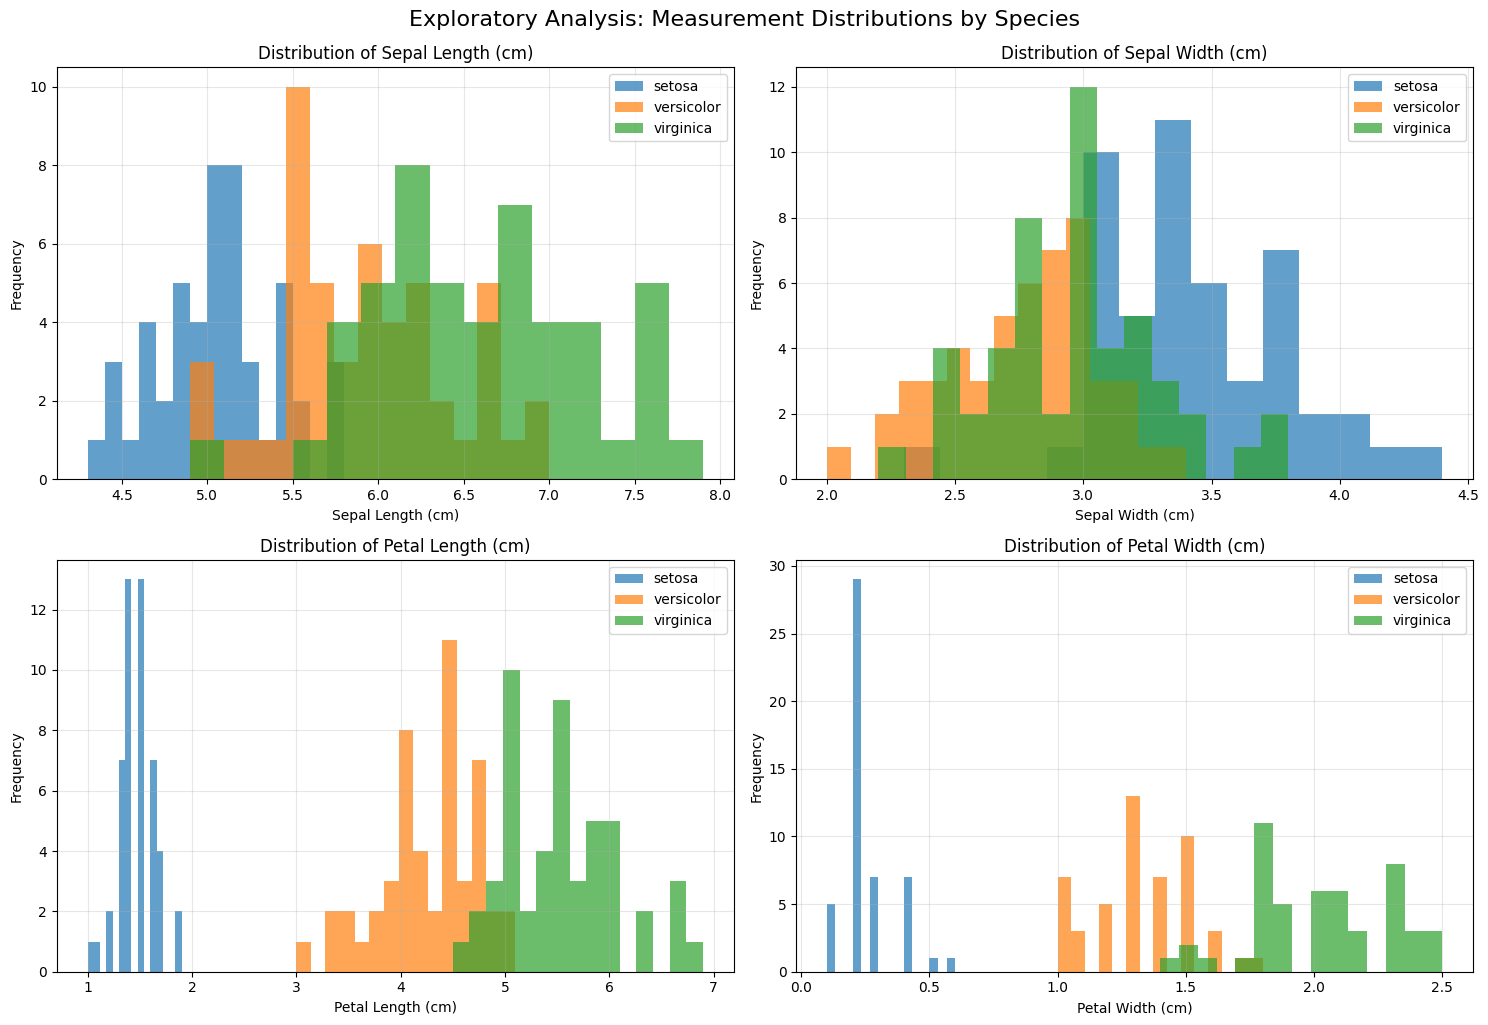

DISCOVERY: Petal measurements show much clearer separation between species than sepal measurements.


In [3]:
# 1. Distribution of measurements by species
plt.figure(figsize=(15, 10))

measurements = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
titles = ['Sepal Length (cm)', 'Sepal Width (cm)', 'Petal Length (cm)', 'Petal Width (cm)']

for i, (measure, title) in enumerate(zip(measurements, titles), 1):
    plt.subplot(2, 2, i)
    
    for species in iris['species'].unique():
        data = iris[iris['species'] == species][measure]
        plt.hist(data, alpha=0.7, label=species, bins=15)
    
    plt.xlabel(title)
    plt.ylabel('Frequency')
    plt.title(f'Distribution of {title}')
    plt.legend()
    plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.suptitle('Exploratory Analysis: Measurement Distributions by Species', fontsize=16, y=1.02)
plt.show()

print("DISCOVERY: Petal measurements show much clearer separation between species than sepal measurements.")

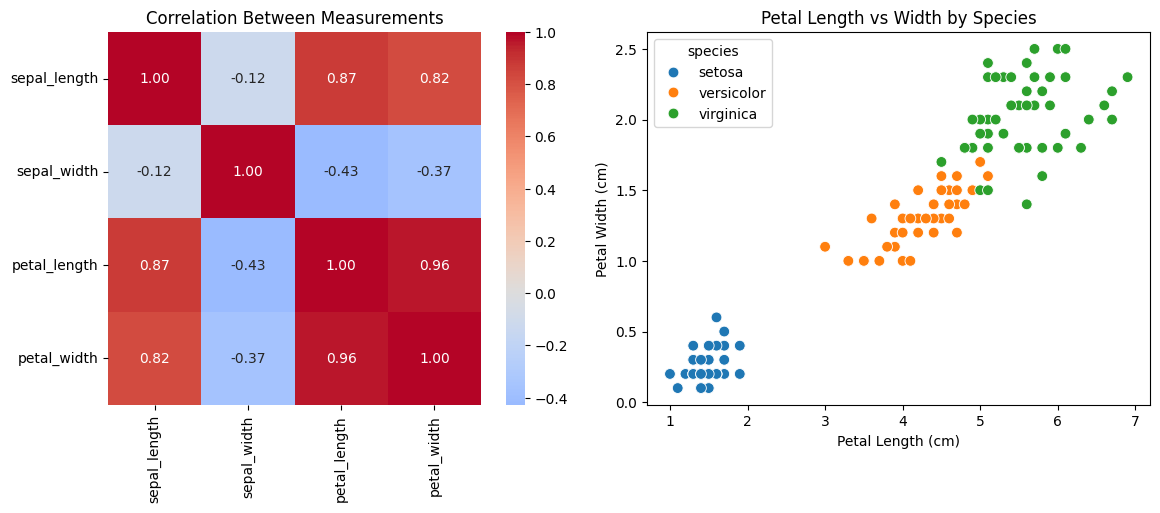

DISCOVERY: Strong positive correlation between petal length and width (0.96).
DISCOVERY: Petal measurements clearly separate the three species into distinct clusters.


In [4]:
# 2. Correlation analysis
plt.figure(figsize=(12, 5))

# Correlation heatmap
plt.subplot(1, 2, 1)
correlation_matrix = iris[measurements].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, fmt='.2f')
plt.title('Correlation Between Measurements')

# Pairwise relationships
plt.subplot(1, 2, 2)
sns.scatterplot(data=iris, x='petal_length', y='petal_width', hue='species', s=60)
plt.title('Petal Length vs Width by Species')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')

plt.tight_layout()
plt.show()

print("DISCOVERY: Strong positive correlation between petal length and width (0.96).")
print("DISCOVERY: Petal measurements clearly separate the three species into distinct clusters.")

C:\Users\haadh\AppData\Local\Temp\ipykernel_29456\2204736702.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=iris, x='species', y=measure, palette='Set2')
C:\Users\haadh\AppData\Local\Temp\ipykernel_29456\2204736702.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=iris, x='species', y=measure, palette='Set2')
C:\Users\haadh\AppData\Local\Temp\ipykernel_29456\2204736702.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=iris, x='species', y=measure, palette='Set2')
C:\Users\haadh\AppData\Local\Temp\ipykernel_29456\22047

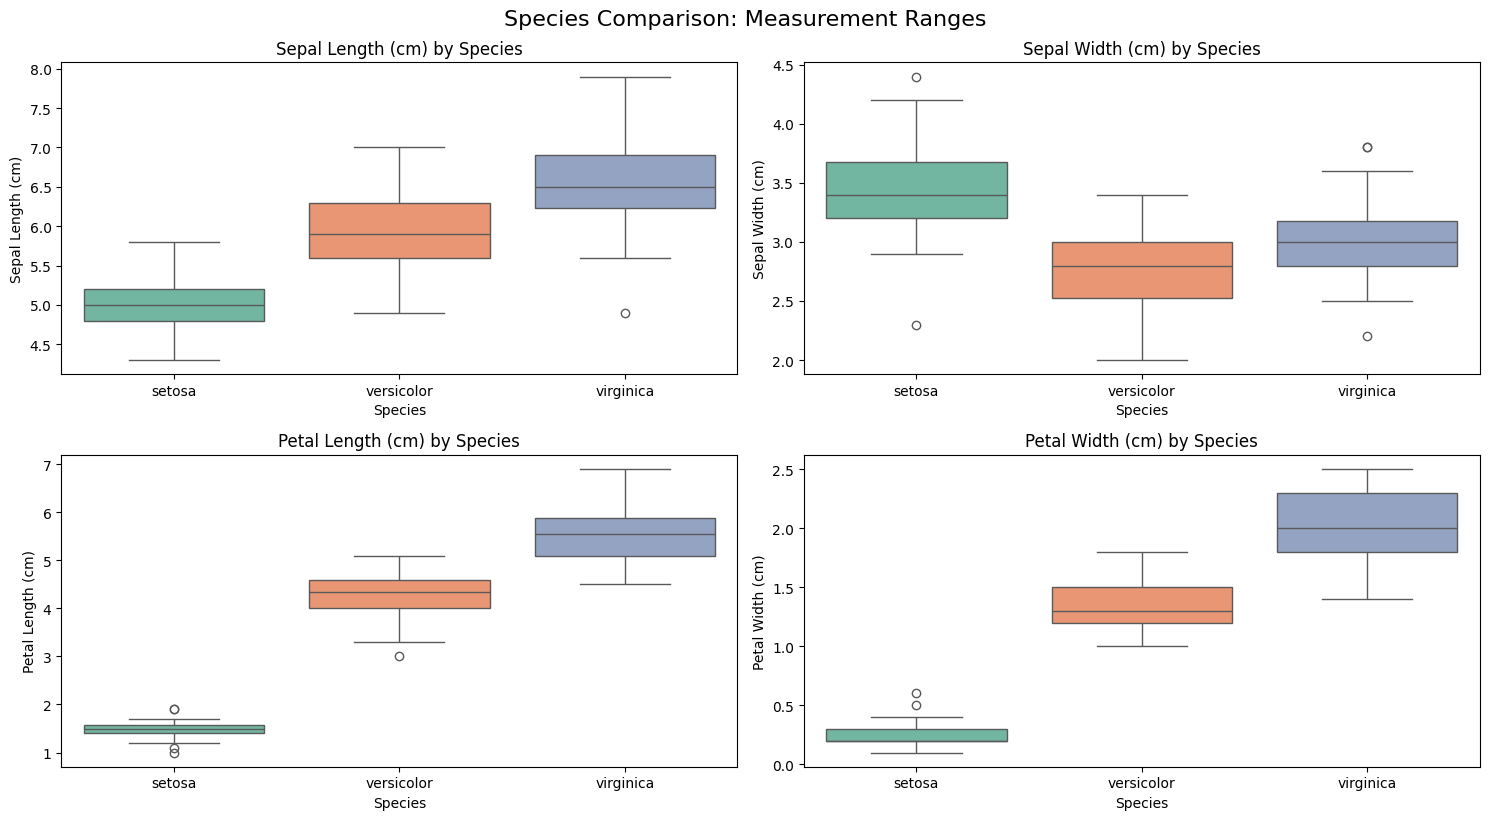

=== STATISTICAL SUMMARY BY SPECIES ===
           sepal_length       sepal_width       petal_length        \
                   mean   std        mean   std         mean   std   
species                                                              
setosa             5.01  0.35        3.43  0.38         1.46  0.17   
versicolor         5.94  0.52        2.77  0.31         4.26  0.47   
virginica          6.59  0.64        2.97  0.32         5.55  0.55   

           petal_width        
                  mean   std  
species                       
setosa            0.25  0.11  
versicolor        1.33  0.20  
virginica         2.03  0.27  

DISCOVERY: Setosa has distinctly smaller petals, while Virginica has the largest overall size.
DISCOVERY: Versicolor falls between Setosa and Virginica in most measurements.


In [5]:
# 3. Species comparison - boxplots
plt.figure(figsize=(15, 8))

for i, (measure, title) in enumerate(zip(measurements, titles), 1):
    plt.subplot(2, 2, i)
    sns.boxplot(data=iris, x='species', y=measure, palette='Set2')
    plt.title(f'{title} by Species')
    plt.xlabel('Species')
    plt.ylabel(title)

plt.tight_layout()
plt.suptitle('Species Comparison: Measurement Ranges', fontsize=16, y=1.02)
plt.show()

# Statistical summary by species
print("=== STATISTICAL SUMMARY BY SPECIES ===")
summary_stats = iris.groupby('species')[measurements].agg(['mean', 'std']).round(2)
print(summary_stats)

print("\nDISCOVERY: Setosa has distinctly smaller petals, while Virginica has the largest overall size.")
print("DISCOVERY: Versicolor falls between Setosa and Virginica in most measurements.")

## Polished Visualizations for Storytelling

Based on our exploration, I've identified the key story: **Iris species can be easily distinguished by their petal characteristics**. The following visualizations are designed to communicate this insight clearly to any audience.

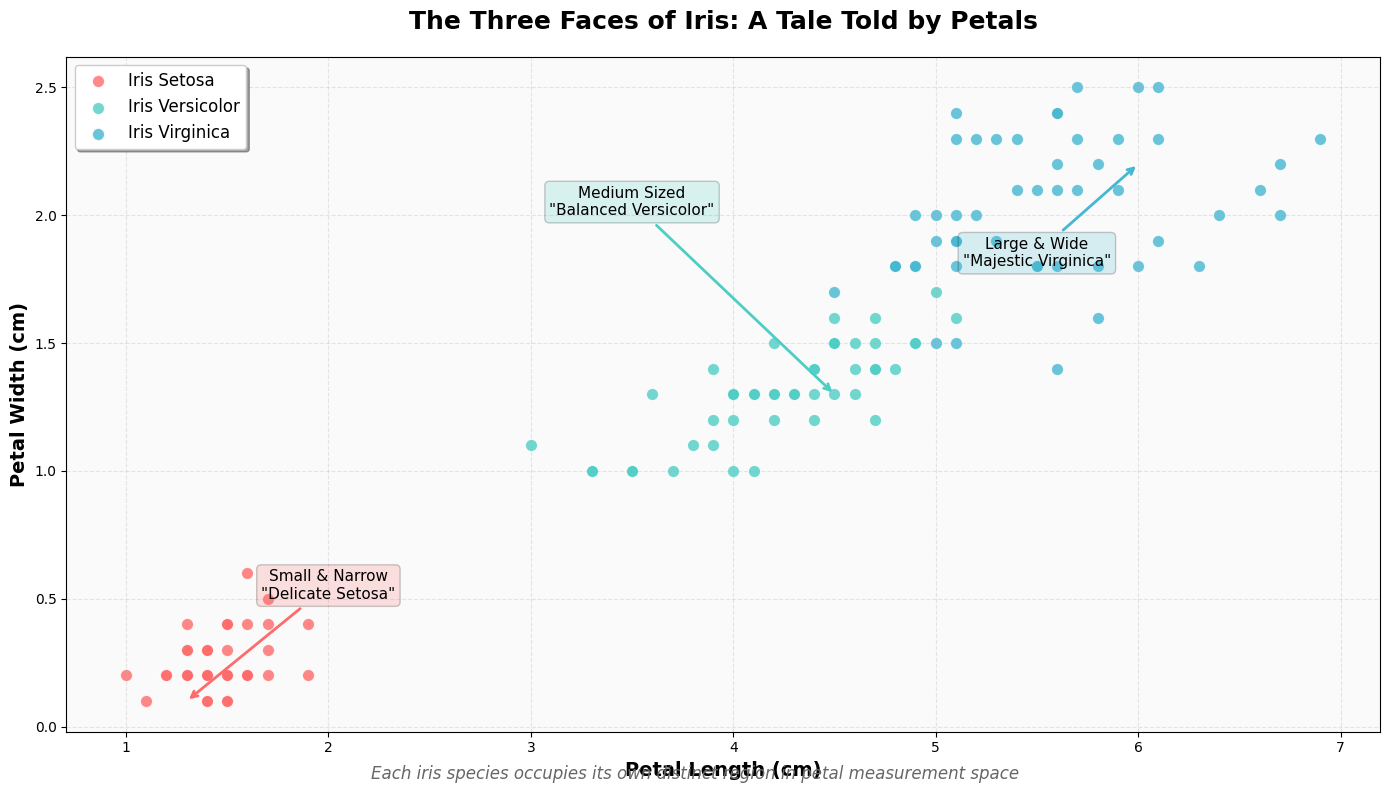

In [6]:
# POLISHED VISUALIZATION 1: The Petal Story
plt.figure(figsize=(14, 8))

# Create the main scatter plot
colors = {'setosa': '#FF6B6B', 'versicolor': '#4ECDC4', 'virginica': '#45B7D1'}
species_names = {'setosa': 'Iris Setosa', 'versicolor': 'Iris Versicolor', 'virginica': 'Iris Virginica'}

for species in iris['species'].unique():
    data = iris[iris['species'] == species]
    plt.scatter(data['petal_length'], data['petal_width'], 
               c=colors[species], label=species_names[species], 
               s=80, alpha=0.8, edgecolors='white', linewidth=1)

# Enhance the plot with annotations and styling
plt.xlabel('Petal Length (cm)', fontsize=14, fontweight='bold')
plt.ylabel('Petal Width (cm)', fontsize=14, fontweight='bold')
plt.title('The Three Faces of Iris: A Tale Told by Petals', 
          fontsize=18, fontweight='bold', pad=20)

# Add species region annotations
plt.annotate('Small & Narrow\n"Delicate Setosa"', xy=(1.3, 0.1), xytext=(2, 0.5),
            arrowprops=dict(arrowstyle='->', color='#FF6B6B', lw=2),
            fontsize=11, ha='center', 
            bbox=dict(boxstyle="round,pad=0.3", facecolor='#FF6B6B', alpha=0.2))

plt.annotate('Medium Sized\n"Balanced Versicolor"', xy=(4.5, 1.3), xytext=(3.5, 2),
            arrowprops=dict(arrowstyle='->', color='#4ECDC4', lw=2),
            fontsize=11, ha='center',
            bbox=dict(boxstyle="round,pad=0.3", facecolor='#4ECDC4', alpha=0.2))

plt.annotate('Large & Wide\n"Majestic Virginica"', xy=(6, 2.2), xytext=(5.5, 1.8),
            arrowprops=dict(arrowstyle='->', color='#45B7D1', lw=2),
            fontsize=11, ha='center',
            bbox=dict(boxstyle="round,pad=0.3", facecolor='#45B7D1', alpha=0.2))

# Styling
plt.legend(fontsize=12, loc='upper left', frameon=True, fancybox=True, shadow=True)
plt.grid(True, alpha=0.3, linestyle='--')
plt.gca().set_facecolor('#FAFAFA')

# Add subtitle
plt.figtext(0.5, 0.02, 'Each iris species occupies its own distinct region in petal measurement space', 
            ha='center', fontsize=12, style='italic', color='#666666')

plt.tight_layout()
plt.show()

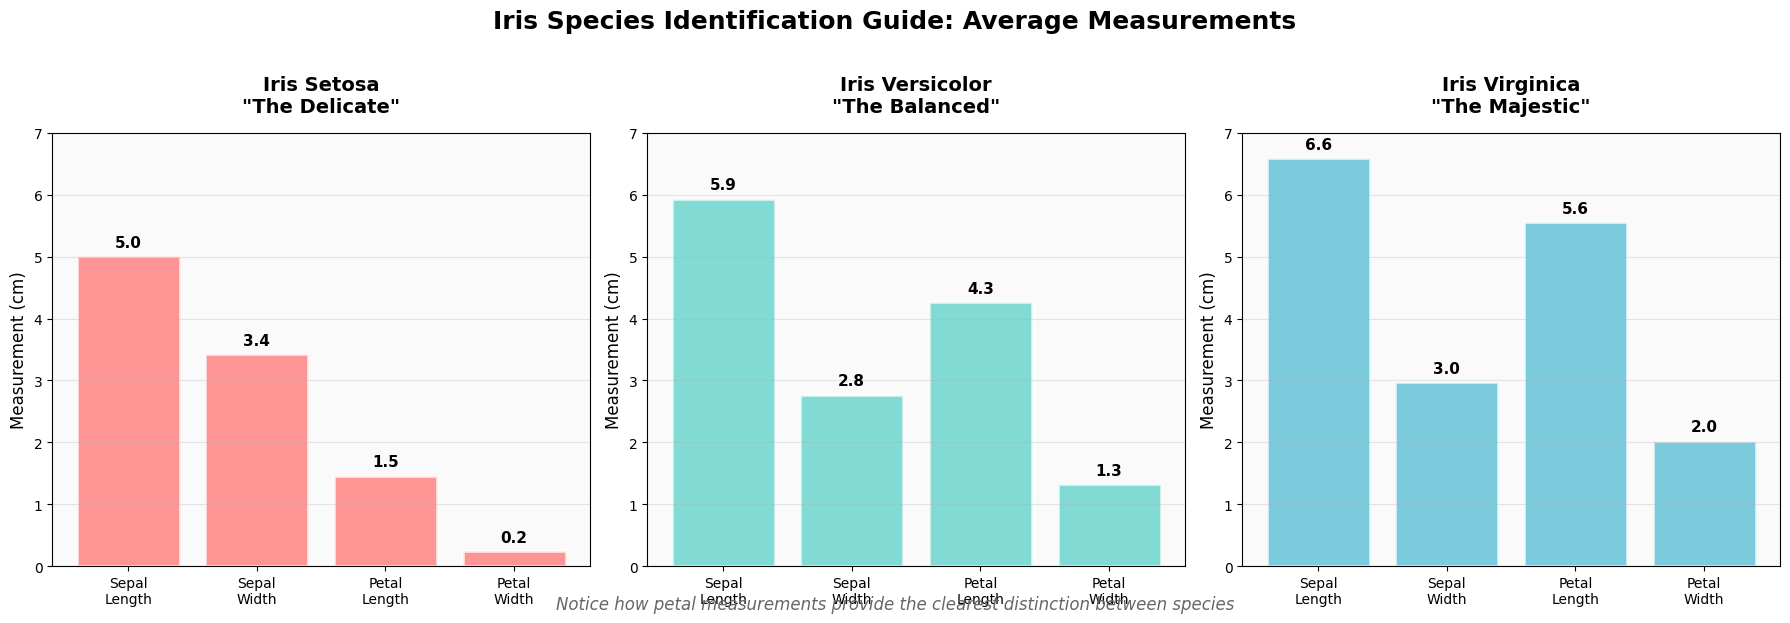

In [7]:
# POLISHED VISUALIZATION 2: Species Identification Guide
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Calculate means for each species
species_means = iris.groupby('species')[measurements].mean()

# Create radar chart data
categories = ['Sepal\nLength', 'Sepal\nWidth', 'Petal\nLength', 'Petal\nWidth']
colors_list = ['#FF6B6B', '#4ECDC4', '#45B7D1']
species_list = ['setosa', 'versicolor', 'virginica']
species_titles = ['Iris Setosa\n"The Delicate"', 'Iris Versicolor\n"The Balanced"', 'Iris Virginica\n"The Majestic"']

for i, (species, color, title) in enumerate(zip(species_list, colors_list, species_titles)):
    ax = axes[i]
    
    # Create bar chart for each species
    values = species_means.loc[species].values
    bars = ax.bar(categories, values, color=color, alpha=0.7, edgecolor='white', linewidth=2)
    
    # Add value labels on bars
    for bar, value in zip(bars, values):
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height + 0.1,
                f'{value:.1f}', ha='center', va='bottom', fontweight='bold', fontsize=11)
    
    # Styling
    ax.set_title(title, fontsize=14, fontweight='bold', pad=15)
    ax.set_ylabel('Measurement (cm)', fontsize=12)
    ax.set_ylim(0, 7)
    ax.grid(True, alpha=0.3, axis='y')
    ax.set_facecolor('#FAFAFA')
    
    # Rotate x-axis labels
    plt.setp(ax.get_xticklabels(), rotation=0, ha='center')

plt.suptitle('Iris Species Identification Guide: Average Measurements', 
             fontsize=18, fontweight='bold', y=1.02)

plt.figtext(0.5, 0.02, 'Notice how petal measurements provide the clearest distinction between species', 
            ha='center', fontsize=12, style='italic', color='#666666')

plt.tight_layout()
plt.show()

## The Story: Nature's Perfect Classification System

**The iris dataset reveals nature's remarkable consistency in species design through a tale of three sisters.** Iris Setosa, "The Delicate," presents herself with the smallest petals rarely exceeding 2cm in any dimension - her compact, delicate features make her instantly recognizable. Iris Versicolor, "The Balanced," serves as the diplomatic middle sister with measurements that fall consistently between her siblings, while Iris Virginica, "The Majestic," commands attention with her impressive petals that can reach over 6cm in length and 2.5cm in width. Through careful measurement of just four simple characteristics, we can perfectly distinguish between these three species with remarkable accuracy.

**This analysis demonstrates the profound power of systematic observation in understanding our natural world.** The iris dataset has become a classic in data science precisely because it tells such a clear story about how evolution creates distinct, measurable differences between related species. What makes this particularly fascinating is that while sepal measurements show considerable overlap between species, petal measurements provide nearly perfect classification - revealing that nature has encoded species identity most clearly in these specific features. This discovery showcases how exploratory data analysis can uncover hidden patterns and insights that might not be obvious through casual observation alone.